# K-means clustering - example I

In [45]:
from sklearn.datasets import make_blobs 
import numpy as np

# Ex.1 Please analyse the function parameters and generated output.
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

In [46]:
# Ex.2 Please call make_blob and generate a dataset with 120 samples, 2 features, 4 centres (clusters), and cluster_std=0.40.
X, y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.40)

In [47]:
# Ex.3 Analyse the x and y shape.
print(X.shape)
print(X.shape)

(120, 2)
(120, 2)


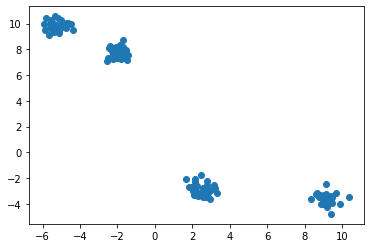

In [48]:
import matplotlib.pyplot as plt
# Ex.4 Plot the data samples in X to see the clusters.
plt.scatter(X[:,0],X[:,1])

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans_pred = kmeans.predict(X)



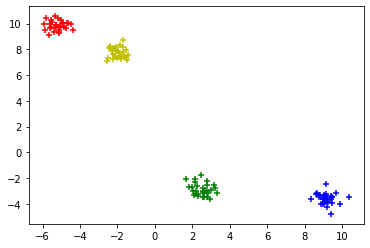

In [50]:
colormap = np.array(['r', 'g','b','y'])
plt.scatter(X[:,0], X[:,1],c= colormap[kmeans_pred],marker= "+")
plt.show()

In [51]:
print(f'Inertia: {kmeans.inertia_}')

Inertia: 36.998280506689525


# K-means clustering - example II

In [52]:
# Change the parameters of our data generation process to create different-looking clusters (eg. about 5 clusters and cluster_std=0.8).
X2, y2 = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)
print(X2.shape)
print(X2.shape)

(120, 2)
(120, 2)


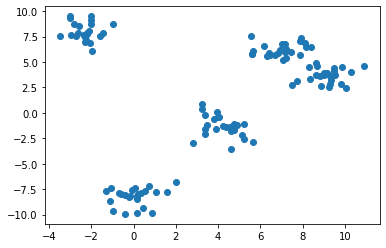

In [53]:
import matplotlib.pyplot as plt
# Ex.1 Plot the data
plt.scatter(X2[:,0],X2[:,1])

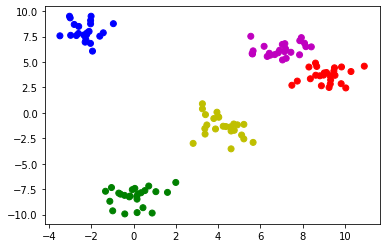

In [54]:
from sklearn.cluster import KMeans


# Ex.2 Predict for the same nb. of clusters = 5.
kmeans2 = KMeans(n_clusters=5, random_state=0).fit(X2)
kmeans_pred2 = kmeans2.predict(X2)
colormap = np.array(['r', 'g','b','y','m'])
plt.scatter(X2[:,0], X2[:,1],c= colormap[kmeans_pred2])
plt.show()

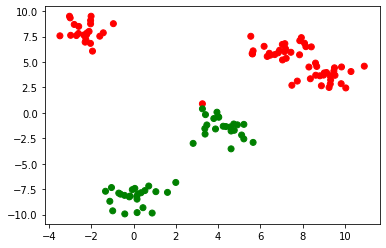

In [55]:
from sklearn.cluster import KMeans


# Ex.3 Predict for 2 instead of 5 clusters.
kmeans2_2 = KMeans(n_clusters=2, random_state=0).fit(X2)
kmeans_pred2_2 = kmeans2_2.predict(X2)
colormap = np.array(['r', 'g','b','y','m'])
plt.scatter(X2[:,0], X2[:,1],c= colormap[kmeans_pred2_2])
plt.show()

In [56]:
# For 5 clusters predict
print(f'Inertia: {kmeans2.inertia_}')
# For 2 clusters predict
print(f'Inertia: {kmeans2_2.inertia_}')

Inertia: 150.5202257206923
Inertia: 2920.509822111535


# K-means ++

In [57]:
kmeans_random = KMeans(n_clusters=5, random_state=0,init='random').fit(X2)
kmeans_random_pred = kmeans_random.predict(X2)

kmeans_pp = KMeans(n_clusters=5, random_state=0,init='k-means++').fit(X2)
kmeans_pp_pred = kmeans_pp.predict(X2)


In [58]:
print(f'Inertia K-means: {kmeans_random.inertia_}')
print(f'Inertia K-means++: {kmeans_pp.inertia_}')

Inertia K-means: 150.5202257206923
Inertia K-means++: 150.5202257206923


# Elbow method

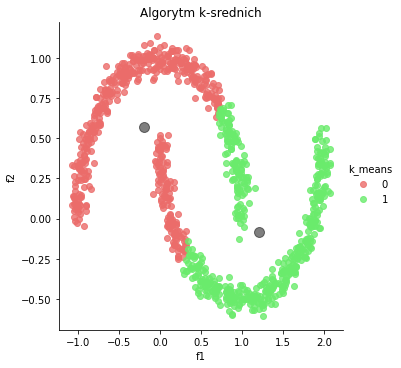

In [59]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])
#TODO: Kmeans
kmeans = KMeans(init='k-means++', n_clusters=2)
kmeans.fit(x, y)
y_km = kmeans.predict(x)
centers = kmeans.cluster_centers_
#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

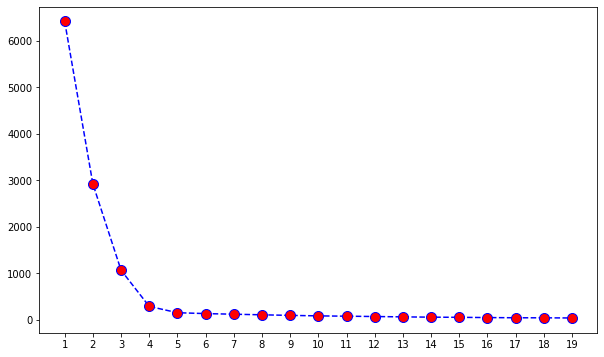

In [60]:
k = 20
inertia_list = []
for i in range(1,k):
  kmeans_k = KMeans(n_clusters=i, random_state=0).fit(X2)
  kmeans_pred_k = kmeans_k.predict(X2)
  inertia_list.append(kmeans_k.inertia_)

plt.figure(figsize=(10,6))
plt.xticks(range(1,k))
plt.plot(range(1,k),inertia_list,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.show()

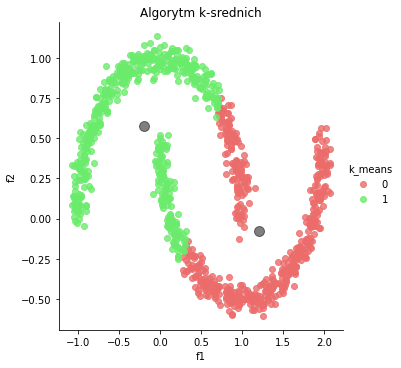

In [61]:
from sklearn.datasets import make_moons
import seaborn as sns
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])
#TODO: Kmeans
kmeans = KMeans(init='k-means++', n_clusters=2)
kmeans.fit(x, y)
y_km = kmeans.predict(x)
centers = kmeans.cluster_centers_

#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

# Clustering II - hierarchical methods

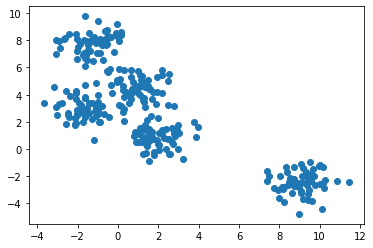

In [62]:
# Ex.1 Plot the data.
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)


plt.scatter(X[:,0],X[:,1])

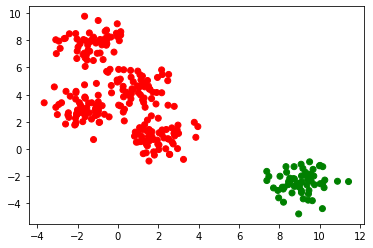

In [63]:
# Ex.2 Use the Means function with k=2 to assign points to clusters.
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans_pred = kmeans.predict(X)
colormap = np.array(['r', 'g','b','y','m'])
plt.scatter(X[:,0], X[:,1],c= colormap[kmeans_pred])
plt.show()

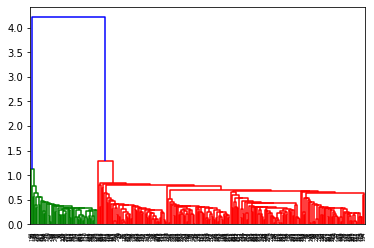

In [64]:
# Ex.3 Use the scipy libraries to draw the dendrogram for the data:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
d = dendrogram(Z)

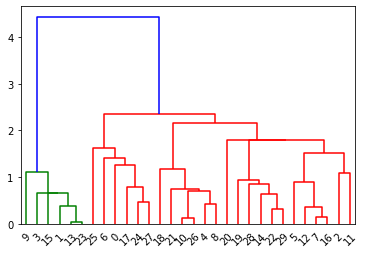

In [65]:
# Ex.4 Something this makes clear is that visualizing the dengrogram is useful, but it's not for big dataset. Create a smaller dataset to draw a dendogram.
X, y_true = make_blobs(n_samples=30, centers=5, cluster_std=0.8, random_state=0)
Z = linkage(X)
d = dendrogram(Z)

# Agglomerative clustering

In [66]:
# Ex.5 Please read the dataset and choose columns to further analysis. 
# The dataset contains 200 records and 5 attributes. 
# Use only Annual Income (in thousands of dollars) and Spending Score (1-100) columns for clustering.
data = pd.read_csv('shopping_data.csv')
X = data[["Annual Income (k$)","Spending Score (1-100)"]]

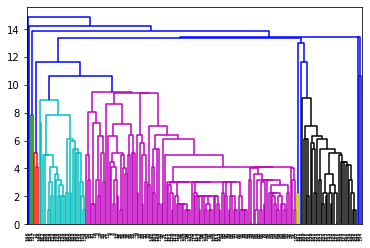

In [67]:
# Ex.6 Create a dendrogram to chose the appropriate k value.
Z = linkage(X)
d = dendrogram(Z)

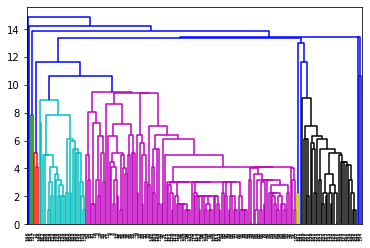

In [68]:
# Ex.7 Analyse results for different linkage values - single, average,complete linkage and Ward. 
# The linkage method takes the dataset and the method to minimize distances as parameters.
#  We use 'ward' as the method since it minimizes then variants of distances between the clusters. 
# (pl. Celem zadania będzie porównanie działania metody średnich połączeń (ang. avarage linkage), 
# metody Warda, pojedynczego połączenia (ang. single linkage) oraz pełnego wiązania (ang. complete linkage).).
Z = linkage(X, method = 'single')
d = dendrogram(Z)

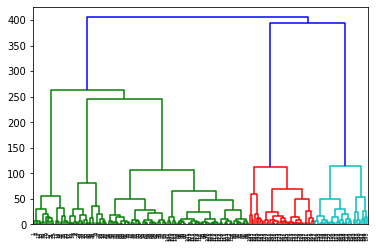

In [69]:
Z = linkage(X, method = 'ward')
d = dendrogram(Z)

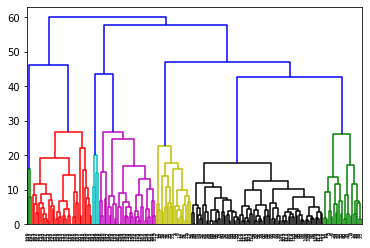

In [70]:
Z = linkage(X, method = 'average')
d = dendrogram(Z)

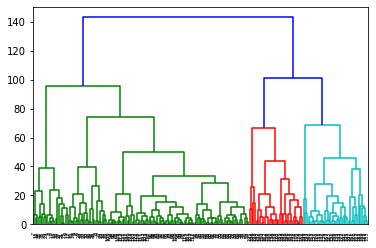

In [71]:
Z = linkage(X, method = 'complete')
d = dendrogram(Z)

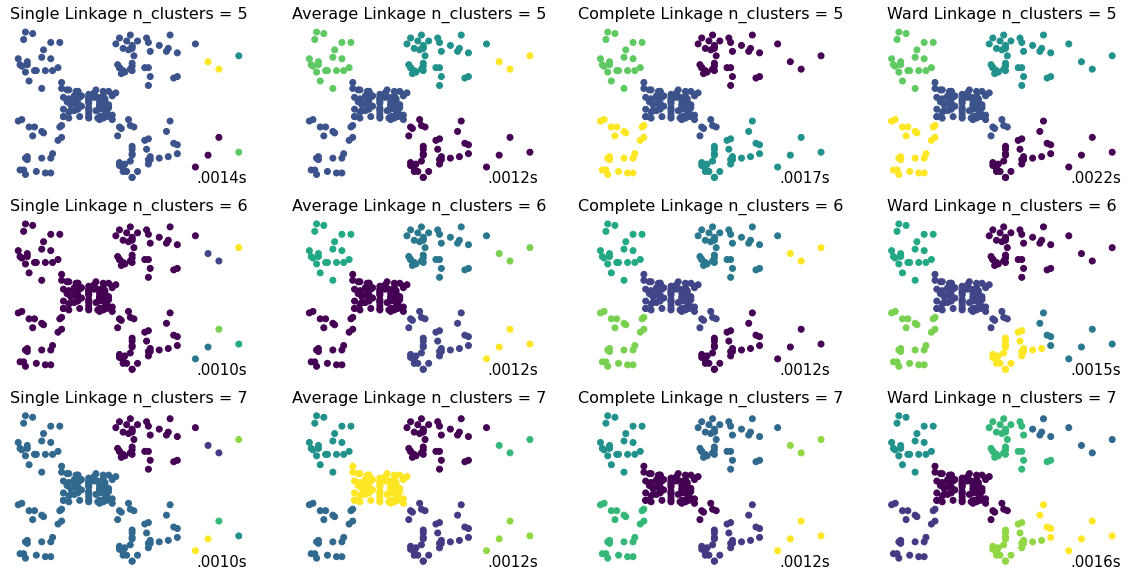

In [72]:
# Ex.8 Use the AgglomerativeClustering class of the sklearn.cluster library to build the model predict clusters.
# Ex.9 Plot the clusters to see how actually our data has been clustered.
from sklearn.cluster import AgglomerativeClustering
import time
clustering_algorithms = (
    ('Single Linkage', "single"),
    ('Average Linkage', "average"),
    ('Complete Linkage', "complete"),
    ('Ward Linkage', "ward"),
)

X = np.array(X)
plt.figure(figsize=(20, 10))
plot_num = 1

for n_clusters in range(5, 8):
    for name, linkage in clustering_algorithms:
        algorithm = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()

        plt.subplot(3, len(clustering_algorithms), plot_num)
        plt.title(name + " n_clusters = " + str(n_clusters), size=16)
        plt.scatter(X[:, 0], X[:, 1], c=algorithm.labels_)
        plt.text(.99, .01, ('%.4fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plt.axis('off')
        plot_num += 1

# Selecting the number of clusters with silhouette analysis on KMeans clustering

In [73]:
# Ex.1 Create the dataset:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

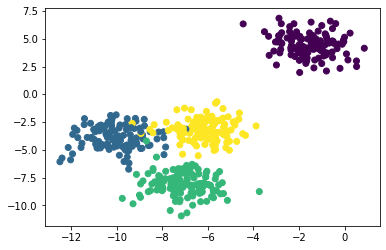

In [74]:
plt.scatter(X[:, 0], X[:, 1], c=y)

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194


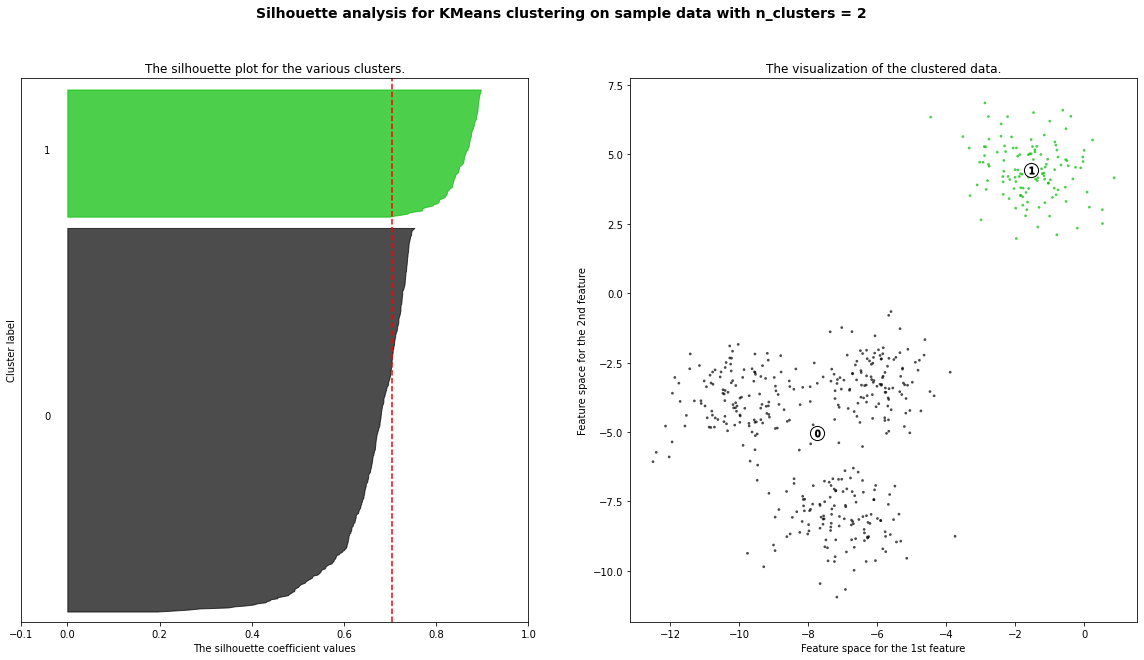

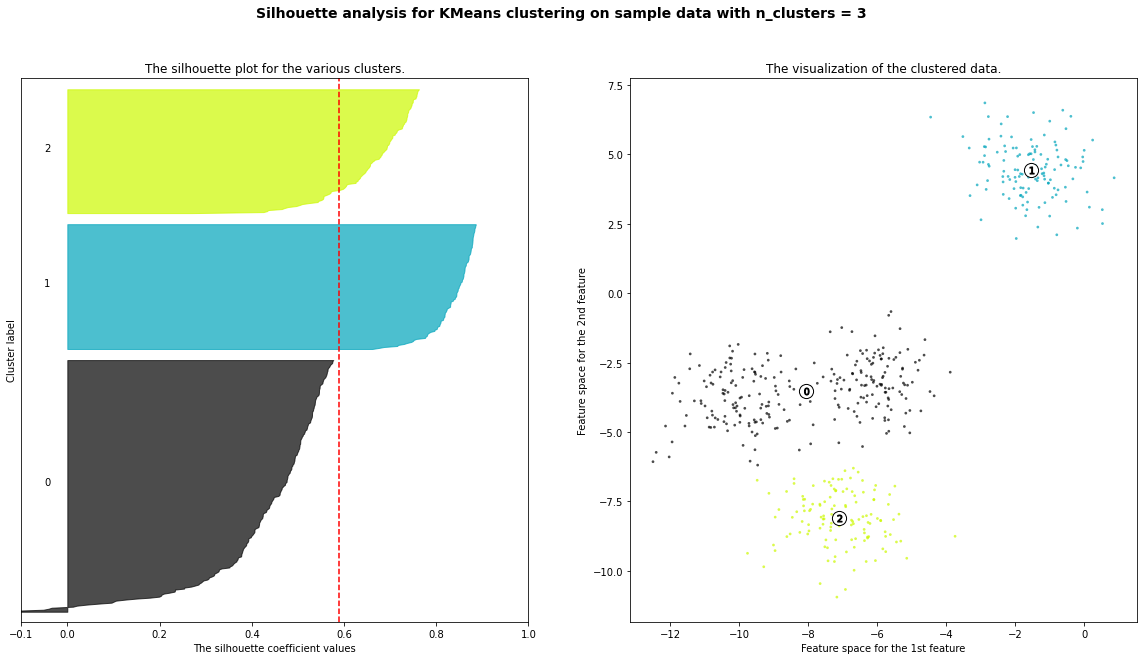

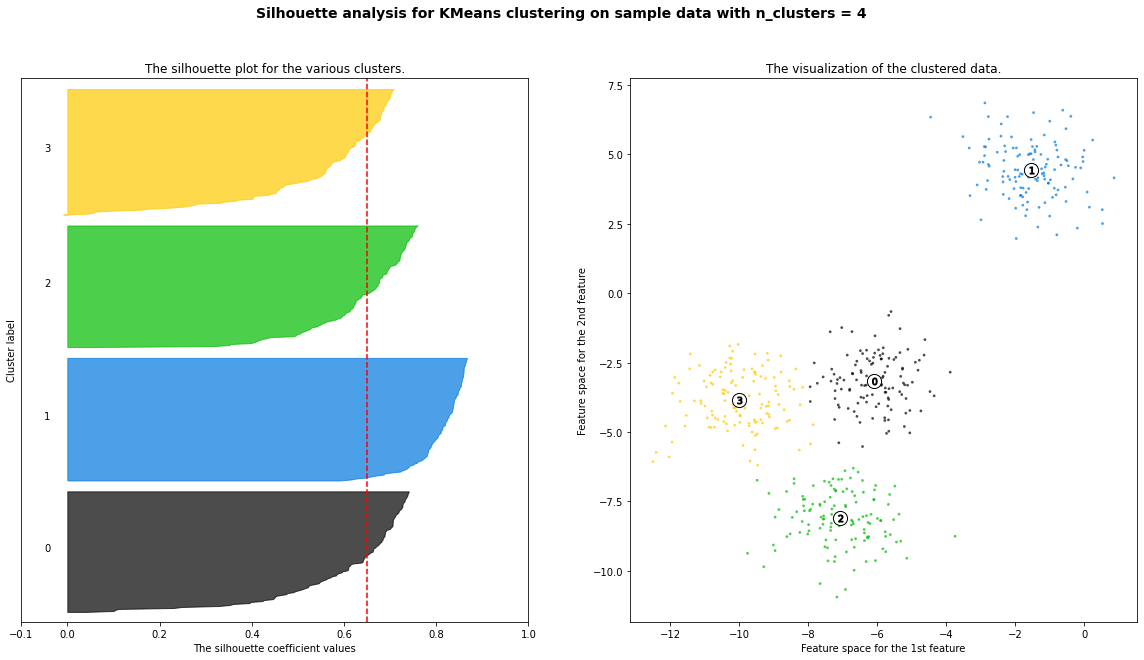

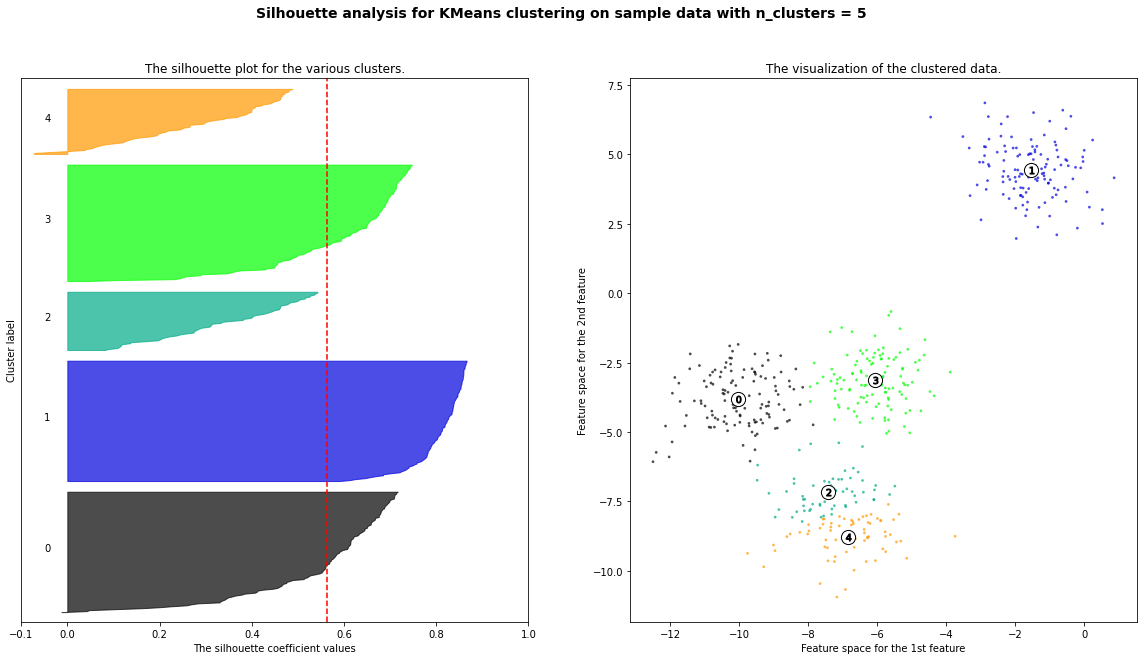

In [75]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
# Ex.2 Determine the cluster range [2,3….]
# Ex.3 Iterate for all the values in cluster range:
    # Perform k-Means
    # Calculate and print the silhouette_score
    # Compute the silhouette scores for each sample more
    # Aggregate the silhouette scores for samples belonging to cluster i, sort them and plot (visualization the result)
    # Have a look here to check you solution and plot the silhouette plot more
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 10)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# DBSCAN algorithm

In [76]:
# Ex.1 Comparing different (KMeans, agglomerative, DBSCAN) clustering algorithms on following datasets:
from sklearn import  datasets
 
 
# ============
# Generate datasets.
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
 
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
 
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

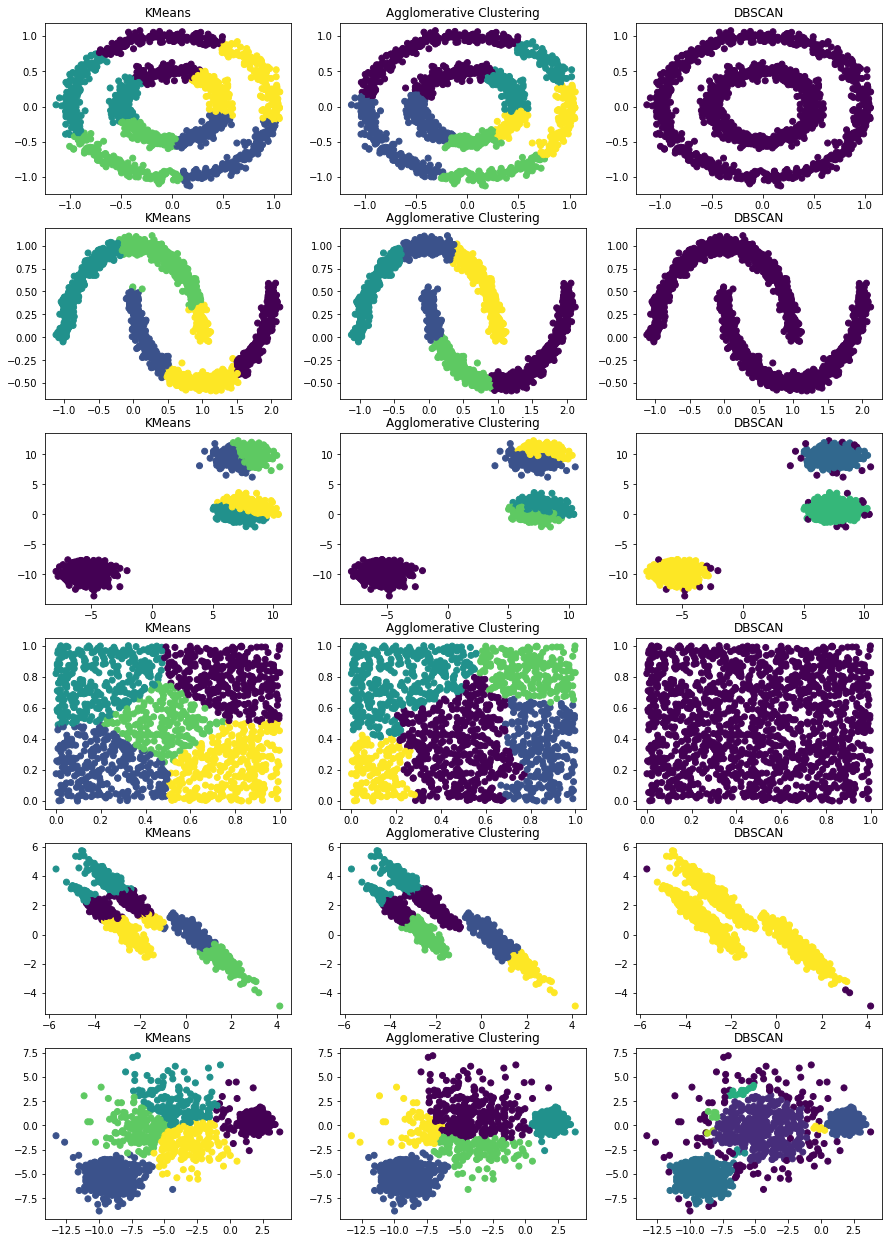

In [77]:
from sklearn.cluster import KMeans, DBSCAN

datasets = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
plot_num = 1
plt.figure(figsize=(15, 22))
for dataset in datasets:
    y_pred_km = KMeans(n_clusters=5).fit_predict(dataset[0], dataset[1])
    y_pred_ag = AgglomerativeClustering(n_clusters=5).fit_predict(dataset[0] ,dataset[1])
    y_pred_db = DBSCAN().fit_predict(dataset[0], dataset[1])
    
    plt.subplot(6, 3, plot_num)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred_km)
    plt.title("KMeans")
    plot_num += 1
    
    plt.subplot(6, 3, plot_num)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred_ag)
    plt.title("Agglomerative Clustering")
    plot_num += 1
    
    plt.subplot(6, 3, plot_num)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred_db)
    plt.title("DBSCAN")
    plot_num += 1